In [2]:
!pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 11.1 MB/s            


In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# '10172_1000175_0000' - t2
# '10172_1000175_0001' - adc
# '10172_1000175_0002' - highb

# need to check

In [6]:
# load nibabel object
path_to_im = '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10172_1000175_0000.nii.gz'
im = nib.load(path_to_im)

In [7]:
# get voxel size
im.header['pixdim'][1:4] 

array([0.3      , 0.3      , 3.6000001], dtype=float32)

In [8]:
# get numpy array
im_npy = im.get_fdata()

In [9]:
im_npy.shape

(640, 640, 21)

(-0.5, 639.5, 639.5, -0.5)

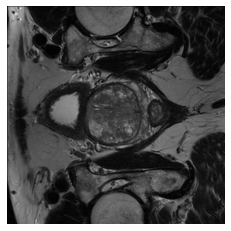

In [15]:
z_slice = 10
plt.imshow(im_npy[:, :, z_slice], cmap='gray')
plt.axis('off')

In [13]:
np.unique(im_npy)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.262e+03, 1.264e+03,
       1.296e+03])

### Tasks:

Images:
1. Check whether voxel space is equal between t2, adc and high for each patient
2. Find median voxel spacing for all patients
3. Test different normalization techniques


Labels:
1. Histogram of number of lesions per patients
2. Histogram of individual lesion volumes 
3. Histogram of tumor garde